In [109]:
import pandas as pd
import numpy as np

In [110]:
train_data = pd.read_csv("cleaned_train.csv")
test_data = pd.read_csv("cleaned_test.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
train_data

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH,text
0,1925202,1650,2125.980000,hang front side 100 hooks colors direct natura...
1,2673191,2755,393.700000,elastane 98 girls marks potter 616 2 trimmings...
2,2765088,7537,748.031495,application included dual pump voltage 12v ele...
3,1594019,2996,787.401574,length dark brand large according colors skinf...
4,2152929,5725,950.000000,one planter makes indoor plants air choice wro...
...,...,...,...,...
1455462,2690647,7978,590.550000,road led auto shockresistantwaterproof light e...
1455463,2422167,3009,1181.100000,df w kh bra material nike ny polyester swsh hn...
1455464,2766635,3413,125.984252,material alloy cute pi jeans get made giving c...
1455465,1987786,1574,1200.000000,one amazon dial printed help warranty perfecti...


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reducing size
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Perform random sampling on the training set
sample_size = 1000000  # Set the desired sample size
train_data_sample = train_data.sample(n=sample_size, random_state=42)

# Save the sampled training data to a CSV file
train_data_sample.to_csv('sample.csv', index=False)


In [ ]:
train_data_reduced = pd.read_csv("sample.csv")

In [ ]:
train_data_reduced.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,1.000000e+06,1000000.000000,1000000.000000
mean,1.934986e+06,4954.911118,1387.879120
std,6.444527e+05,3819.599924,2851.513456
min,7.000000e+00,0.000000,10.236220
25%,1.422742e+06,2082.000000,472.440944
50%,1.948836e+06,3242.000000,787.401574
75%,2.492402e+06,7550.000000,1259.842518
max,2.999997e+06,13420.000000,99606.100000


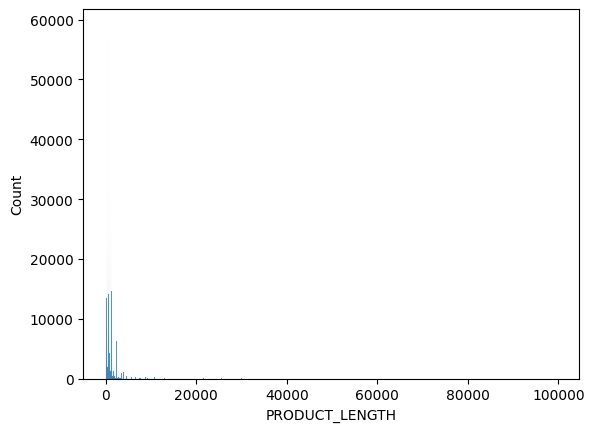

In [ ]:
sns.histplot(train_data_reduced['PRODUCT_LENGTH'])
plt.show()

In [111]:
#transforming our textual data with tfid vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your data
text_column = train_data_reduced["text"]

# Replace missing values with empty strings
text_column = np.where(text_column.isnull(), '', text_column)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on your text data
vectorizer.fit(text_column)

# Transform your text data into numerical values
text_column_numerical = vectorizer.transform(text_column)


#SAME FOR TEST DATA

# Load your data
text_column_test = test_data["text"]

# Replace missing values with empty strings_test
text_column_test = np.where(text_column_test.isnull(), '', text_column_test)

# Transform your text data into numerical values
text_column_numerical_test = vectorizer.transform(text_column_test)

In [112]:
text_column_numerical, text_column_numerical_test

(<1000000x1591762 sparse matrix of type '<class 'numpy.float64'>'
 	with 72978161 stored elements in Compressed Sparse Row format>,
 <734736x1591762 sparse matrix of type '<class 'numpy.float64'>'
 	with 37269043 stored elements in Compressed Sparse Row format>)

In [ ]:
test_data

,PRODUCT_ID,PRODUCT_TYPE_ID,text
0,604373,6142,relief de savoirs traditions d1890 et hliograv...
1,1729783,1622,decor keeps meditation 100 sofa 59 natural par...
2,1871949,7540,partslink 2020 part number front auto warranty...
3,1107571,12442,cloisonn select andgold recognize 1 3mm quanti...
4,624253,6318,visual ti89 ti92 mathematics illustrated
...,...,...,...
734731,921419,7073,16 hoodies l greens hooded pockets ribbed feat...
734732,2456362,1,diving divers logbook book experienced beginne...
734733,841529,10645,bathroom ceramic deck product height assembly1...
734734,1190194,12680,rounded basset front indoor direct kitchen dim...


In [ ]:
test_data

,PRODUCT_ID,PRODUCT_TYPE_ID,text
0,604373,6142,relief de savoirs traditions d1890 et hliograv...
1,1729783,1622,decor keeps meditation 100 sofa 59 natural par...
2,1871949,7540,partslink 2020 part number front auto warranty...
3,1107571,12442,cloisonn select andgold recognize 1 3mm quanti...
4,624253,6318,visual ti89 ti92 mathematics illustrated
...,...,...,...
734731,921419,7073,16 hoodies l greens hooded pockets ribbed feat...
734732,2456362,1,diving divers logbook book experienced beginne...
734733,841529,10645,bathroom ceramic deck product height assembly1...
734734,1190194,12680,rounded basset front indoor direct kitchen dim...


In [ ]:
X.shape

(1000000, 1591763)

In [ ]:
X_test.shape

(734736, 1147827)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack, csc_matrix
import sklearn.metrics as metrics
# Load your data
# text_column_numerical = TF-IDF values for your text column
# product_type_id_column = product_type_id column
# product_length_column = product_length column
product_type_id_column = train_data_reduced["PRODUCT_TYPE_ID"]
product_length_column = train_data_reduced["PRODUCT_LENGTH"]

product_type_id_column_test = test_data["PRODUCT_TYPE_ID"]

# Convert the text_column_numerical array into a CSC matrix
text_column_numerical = csc_matrix(text_column_numerical)
text_column_numerical_test = csc_matrix(text_column_numerical_test)


# Convert the product_type_id_column array into a CSC matrix
product_type_id_column = csc_matrix(product_type_id_column.to_numpy().reshape(-1, 1))
product_type_id_column_test = csc_matrix(product_type_id_column_test.to_numpy().reshape(-1, 1))


# Combine your input features into a single matrix
X = hstack([text_column_numerical, product_type_id_column])

X_test = hstack([text_column_numerical_test,product_type_id_column_test])

# Split your data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, product_length_column, test_size=0.2)
X_train = X
y_train = product_length_column
y_test = product_type_id_column_test
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [117]:
# Evaluate the model
score = max( 0 , 100*(1-metrics.mean_absolute_percentage_error(y_test.toarray(),y_pred)))
mse = mean_squared_error(y_test.toarray(), y_pred)
print(f'Mean squared error: {mse}')
print(f'Score: {score}')

Mean squared error: 24280832.4333926
Score: 0


In [130]:
df = pd.DataFrame(test_data["PRODUCT_ID"])

# Add a new column with the y_pred values
df["y_pred"] = y_pred

# Set the column names
df.columns = ["PRODUCT_ID", "PRODUCT_LENGTH"]

In [133]:
sample = pd.read_csv("sample_submission.csv")

In [134]:
sample

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,701.093794
1,1729783,734.506163
2,1871949,741.360258
3,1107571,730.327767
4,624253,666.847946
...,...,...
734731,921419,733.838809
734732,2456362,746.810825
734733,841529,691.127128
734734,1190194,757.643591


In [137]:
df.to_csv("answer.csv", index=False)